<a href="https://colab.research.google.com/github/yusukennn/pytorch_prac/blob/main/nn_kihon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 必要なパッケージのインストール
!pip3 install torch==1.6.0+cu101
!pip3 install torchvision==0.7.0+cu101
!pip3 install numpy==1.18.5
!pip3 install matplotlib==3.2.2
!pip3 install scikit-learn==0.23.1
!pip3 install seaborn==0.11.0

ERROR: Could not find a version that satisfies the requirement torch==1.6.0+cu101 (from versions: 0.1.2, 0.1.2.post1, 0.1.2.post2, 0.3.1, 0.4.0, 0.4.1, 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.2.0, 1.3.0, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1)
ERROR: No matching distribution found for torch==1.6.0+cu101
ERROR: Could not find a version that satisfies the requirement torchvision==0.7.0+cu101 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.8.0, 0.8.1, 0.8.2)
ERROR: No matching distribution found for torchvision==0.7.0+cu101
     |████████████████████████████████| 20.1MB 1.6MB/s 
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9

     |████████████████████████████████| 6.9MB 3.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 286kB 5.5MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [ ]:
# 必要なパッケージをインポート
import torch
from torch import nn
import torch.nn.functional as F

## 2-3

In [ ]:
net = torch.nn.Sequential(
    nn.Conv2d(1, 6, 3),
    nn.MaxPool2d((2, 2)),
    nn.ReLU(),
    nn.Conv2d(6, 16, 3),
    nn.MaxPool2d(2),
    nn.ReLU()
)
print(net)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): ReLU()
)


In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.canv2(x)), 2)
    return x

net = Net().to('cuda')
print(net)


Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
)


## 2-4 損失関数の計算

バイナリ交差エントロピー損失（nn.BCELoss）

In [ ]:
m = nn.Sigmoid()  # シグモイド関数
y = torch.rand(3) # 予測値（ロジット），データ数は３つ
t = torch.empty(3, dtype=torch.float32).random_(2) # 正解クラス（全２クラス）
criterion = nn.BCELoss() # 損失関数の設定
loss = criterion(m(y), t) # 予測値と正解値との誤差を計算

# 変数の中身を表示
print("y: {}".format(y))
print("m(y): {}".format(m(y)))
print("t: {}".format(t))
print("loss: {:.4f}".format(loss))

y: tensor([1.4381e-01, 3.5854e-02, 1.1444e-04])
m(y): tensor([0.5359, 0.5090, 0.5000])
t: tensor([0., 0., 0.])
loss: 0.7240


ロジット付きバイナリ交差エントロピー損失（nn.BCEWithLogitsLoss）

In [ ]:
import torch
from torch import nn

y = torch.rand(3)
t = torch.empty(3, dtype=torch.float32).random_(2)
criterion = nn.BCEWithLogitsLoss()
loss = criterion(y, t)

# 変数の中身を表示
print("y: {}".format(y))
print("t: {}".format(t))
print("loss: {:.4f}".format(loss))

y: tensor([0.3241, 0.1017, 0.4382])
t: tensor([0., 0., 1.])
loss: 0.7038


ソフトマックス交差エントロピー損失

In [ ]:
y = torch.rand(3, 5) # 予測値（ロジット），データ数は３つで各クラスに対する出力を持つ
t = torch.empty(3, dtype=torch.int64).random_(5) # 正解クラス（全５クラス）
criterion = nn.CrossEntropyLoss() # 損失関数の設定
loss = criterion(y, t) # 予測値と正解値との誤差を計算

print("y: {}".format(y))
print("t: {}".format(t))
print("loss: {:.4f}".format(loss))

y: tensor([[0.9294, 0.3286, 0.4446, 0.6806, 0.1261],
        [0.3801, 0.8113, 0.6708, 0.9484, 0.6607],
        [0.5095, 0.7058, 0.9937, 0.9267, 0.2705]])
t: tensor([0, 0, 4])
loss: 1.7390


平均二乗誤差損失

In [ ]:
y = torch.rand(1, 10) # ネットワークが予測した予測値
t = torch.rand(1, 10) # 正解値
criterion = nn.MSELoss() # 損失関数の設定
loss = criterion(y, t) # 予測値と正解値の誤差を計算

# 変数の中身を表示
print("y: {}".format(y))
print("t: {}".format(t))
print("loss: {:.4f}".format(loss))

y: tensor([[0.8908, 0.7447, 0.9067, 0.8963, 0.5036, 0.7917, 0.5717, 0.7730, 0.9946,
         0.9925]])
t: tensor([[0.2049, 0.9107, 0.5312, 0.2413, 0.7884, 0.7993, 0.4416, 0.8052, 0.8951,
         0.4946]])
loss: 0.1425


平均絶対誤差

In [ ]:
y = torch.rand(1, 10)  # ネットワークが予測した予測値
t = torch.rand(1, 10)  # 正解値
criterion = nn.L1Loss()  # 損失関数の設定
loss = criterion(y, t)  # 予測値と正解値との誤差を計算

# 変数の中身を表示
print("y: {}".format(y))
print("t: {}".format(t))
print("loss: {:.4f}".format(loss))

y: tensor([[0.2530, 0.3944, 0.4460, 0.2716, 0.8971, 0.0831, 0.1681, 0.5415, 0.8836,
         0.3548]])
t: tensor([[0.0247, 0.1046, 0.7714, 0.5159, 0.1602, 0.8183, 0.4805, 0.8422, 0.4573,
         0.3675]])
loss: 0.3612


## 最適化関数

ニューラルネットワークのパラメータ（重み）で損失関数を微分した値がゼロになるようにする．この過程がニューラルネットワークの学習．

アルゴリズムを使って探索的に最適解を探索する．ここで「最適化関数」．またこの手法を勾配降下法．損失関数の微分によって勾配ベクトルを求め，それがゼロとなるようにパラメータ更新を繰り返すことで，損失を最小化する．

現在はAdamを使うことがほとんど


In [ ]:
from torch import optim

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=1e-4, betas=(0.9, 0.99), eps=1e-07)

In [ ]:
# パッケージのインポート
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
import matplotlib.pyplot as plt

# ニューラルネットワークの定義
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x


# ハイパーパラメータの定義
N = 64  # バッチサイズ: 64
D_in = 1000  # 入力次元: 1000
H = 100  # 隠れ層次元: 100
D_out = 10  # 出力次元: 10
epoch = 100 # 学習回数

# データの生成
x = torch.rand(N, D_in)  # 入力データ
y = torch.rand(N, D_out)  # 正解値

# ネットワークのロード
net = Net(D_in, H, D_out)

# 損失関数
criterion = nn.MSELoss()

# 最適化関数
optimizer = optim.Adam(net.parameters(), lr=1e-4, betas=(0.9, 0.99), eps=1e-07)

loss_list = []  # 学習ごとの誤差を格納するリスト
# 学習
for i in range(epoch):
    # データを入力して予測値を計算（順伝播）
    y_pred = net(x)
    # 損失（誤差）を計算
    loss = criterion(y_pred, y)
    print("Epoch: {}, Loss: {:.3f}".format(i+1, loss.item()))  # 誤差を表示
    loss_list.append(loss.item())  # 誤差をリスト化して記録

    # 勾配の初期化
    optimizer.zero_grad()
    # 勾配の計算（逆伝搬）
    loss.backward()
    # パラメータ（重み）の更新
    optimizer.step()

Epoch: 1, Loss: 0.298
Epoch: 2, Loss: 0.263
Epoch: 3, Loss: 0.231
Epoch: 4, Loss: 0.202
Epoch: 5, Loss: 0.176
Epoch: 6, Loss: 0.154
Epoch: 7, Loss: 0.136
Epoch: 8, Loss: 0.121
Epoch: 9, Loss: 0.110
Epoch: 10, Loss: 0.102
Epoch: 11, Loss: 0.097
Epoch: 12, Loss: 0.094
Epoch: 13, Loss: 0.093
Epoch: 14, Loss: 0.093
Epoch: 15, Loss: 0.093
Epoch: 16, Loss: 0.094
Epoch: 17, Loss: 0.094
Epoch: 18, Loss: 0.094
Epoch: 19, Loss: 0.093
Epoch: 20, Loss: 0.092
Epoch: 21, Loss: 0.091
Epoch: 22, Loss: 0.090
Epoch: 23, Loss: 0.088
Epoch: 24, Loss: 0.087
Epoch: 25, Loss: 0.086
Epoch: 26, Loss: 0.085
Epoch: 27, Loss: 0.084
Epoch: 28, Loss: 0.083
Epoch: 29, Loss: 0.082
Epoch: 30, Loss: 0.082
Epoch: 31, Loss: 0.081
Epoch: 32, Loss: 0.081
Epoch: 33, Loss: 0.080
Epoch: 34, Loss: 0.080
Epoch: 35, Loss: 0.079
Epoch: 36, Loss: 0.078
Epoch: 37, Loss: 0.077
Epoch: 38, Loss: 0.077
Epoch: 39, Loss: 0.076
Epoch: 40, Loss: 0.075
Epoch: 41, Loss: 0.075
Epoch: 42, Loss: 0.074
Epoch: 43, Loss: 0.074
Epoch: 44, Loss: 0.0

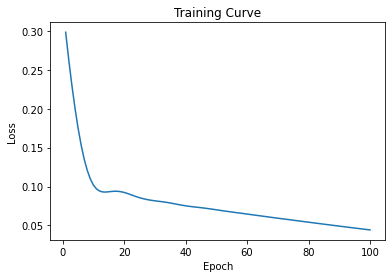

In [ ]:
# 結果を図示
plt.figure()
plt.title('Training Curve')  # タイトル
plt.xlabel('Epoch')  # x軸のラベル
plt.ylabel('Loss')  # y軸のラベル
plt.plot(range(1, epoch+1), loss_list)  # 学習回数ごとの誤差をプロット
plt.show()  # プロットの表示